# FOSSIL DATA ANALYSIS

Goals & STEPS:
- 1. Load the DATA
- 2. Display each slice in every direction
- 3. Show a 3D isosurface plot

In [38]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d  

"skimage.io => imread" : 
This function is used to read an image from a file, loading it into a NumPy array. The resulting arrangement contains the values of the pixels of the image, which can be used for analysis and manipulation of subsequent images. The function can read several file formats, including popular ones such as JPEG, PNG, and TIFF, among others.

In [39]:
fossil_path = 'Gut-PhilElvCropped.tif' # high quality image management
fossil_data = imread(fossil_path)

print('Loading Fossil Data sized {}'.format(fossil_data.shape))

Loading Fossil Data sized (250, 296, 349)


Text(0.5, 1.0, 'Slice Histogram')

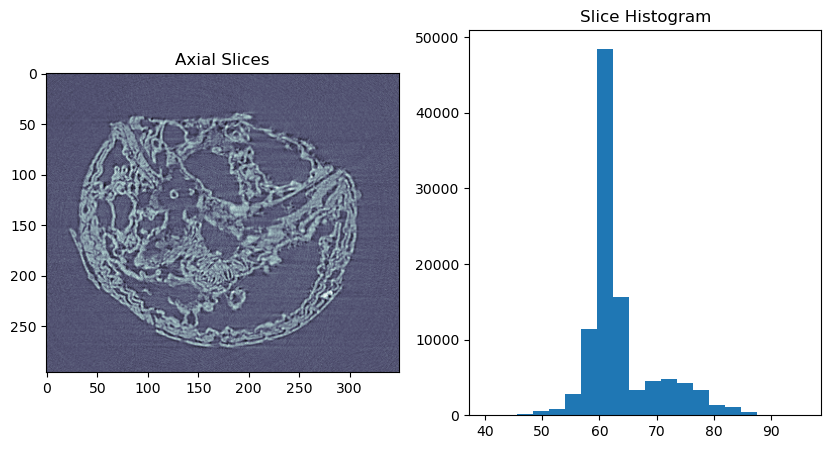

In [40]:
%matplotlib inline
slice_idx = int(fossil_data.shape[0]/2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(fossil_data[slice_idx], cmap = 'bone')
ax1.set_title('Axial Slices')
_ = ax2.hist(fossil_data[slice_idx].ravel(), 20)
ax2.set_title('Slice Histogram')

*Axial Slices*: (X: width of the img ; Y:height of the img) Visually show the internal structure of a specific section of the fossil, allowing structural details to be observed that could indicate the composition or specific characteristics of the scanned object.

*Slice Histogram*: The histogram provides a frequency distribution of the intensity values of the pixels in that slice (y = frequency/number of px; x = intensity values of px). This is useful for analyzing the range of densities present in the slice, which can help identify different materials or conditions within the sample, based on how bright or dark they appear in the image.

## FILTERING

In [ ]:
%matplotlib inline
from scipy.ndimage.filters import median_filter
# filter the data
filter_fossil_data = median_filter(fossil_data, (3,3,3))

# setup the plot
slice_idx = int(fossil_data.shape[0]/2)
test_slice = fossil_data[slice_idx]
test_filt_slice = filter_fossil_data[slice_idx]
# setup the default image arguments
im_args = dict(cmap = 'bone', vmin = 50, vmax = 70)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.imshow(test_slice, **im_args)
ax1.set_title('Unfiltered Slice')
_ = ax2.imshow(test_filt_slice, **im_args)
ax2.set_title('Filtered Slice')

/var/folders/n2/l6w269493p7523tn0555krbm0000gn/T/ipykernel_48632/1403565051.py:2: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter


Text(0.5, 1.0, 'Filtered Slice')

## SHOWING VARIOUS SLICES

Here we show the axial, saggital and coronal slices through the 3D Volume

(-0.5, 2367.5, 1999.5, -0.5)

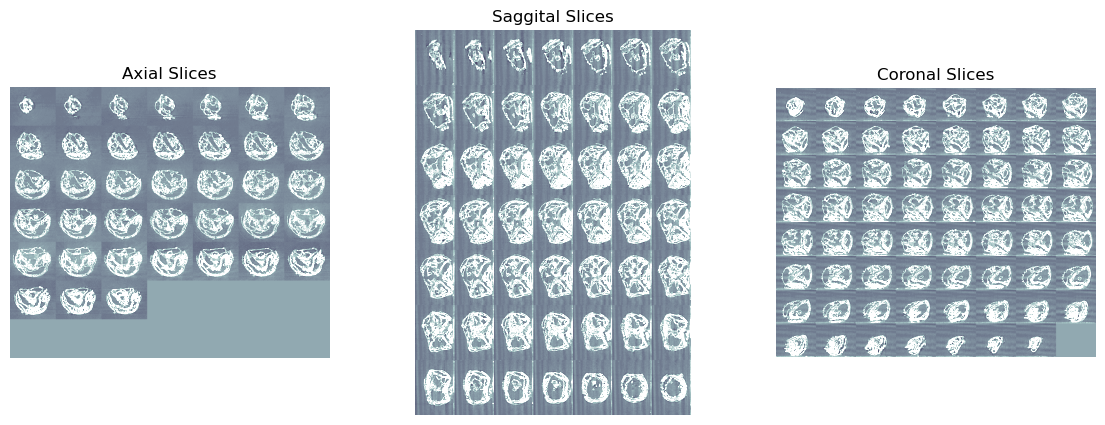

In [42]:
%matplotlib inline
skip_border = 50
skip_middle = 4
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 5))
ax1.imshow(montage2d(filter_fossil_data[skip_border:-skip_border:skip_middle]),**im_args)
ax1.set_title('Axial Slices')
ax1.axis('off')

ax2.imshow(montage2d(filter_fossil_data.transpose(1,2,0)[skip_border:-skip_border:skip_middle]), **im_args)
ax2.set_title('Saggital Slices')
ax2.axis('off')

ax3.imshow(montage2d(filter_fossil_data.transpose(2,0,1)[skip_border:-skip_border:skip_middle]), **im_args)
ax3.set_title('Coronal Slices')
ax3.axis('off')

This code is designed to visualize and compare different orthogonal slices (axial, sagittal, and coronal) of a 3D data set. The resulting images help to understand the internal structure of the object studied from different angles, which is essential in fields such as medicine, biology and paleontology.

## APPLY THRESHOLD

Text(0.5, 1.0, 'Slice with Threshold')

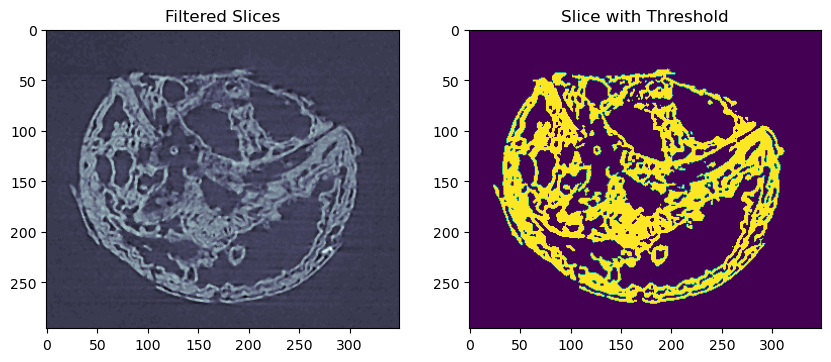

In [43]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
thresh_fossil_data = filter_fossil_data > 65
thresh_slice = thresh_fossil_data[slice_idx]
ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(thresh_slice)
ax2.set_title('Slice with Threshold')


This code is used to visually compare the effect of different processing on an image: an unspecified filter and a threshold.

## MORPHOLOGY

In [70]:
%matplotlib inline
from skimage.morphology import binary_closing, ball
closed_fossil_data = binary_closing(thresh_fossil_data, ball(5))
close_slice = closed_fossil_data[slice_idx]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(close_slice)
ax2.set_title('Slice After Closing')

ImportError: cannot import name 'DEPRECATED' from 'skimage._shared.utils' (/Users/ramonestadella/anaconda3/lib/python3.11/site-packages/skimage/_shared/utils.py)

In [65]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
def show_3d_mesh(p, threshold):
    verts, faces = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.9, edgecolor='none', linewidth = 0.1)
    mesh.set_facecolor([.1, 1, .1])
    mesh.set_edgecolor([1, 0, 0])
    
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    ax.view_init(45, 45)
    return fig

In [66]:
from scipy.ndimage import zoom
# we downsample the image to make 3d rendering quicker
fossil_downscale = zoom(closed_fossil_data.astype(np.float32), 0.25)
# now we display it with a nice mesh
_ = show_3d_mesh(fossil_downscale, 0.5)

NameError: name 'closed_fossil_data' is not defined